In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib notebook

In [2]:
COLS = ['time','src','dst','seqno','code','opt1','opt2']
def parse_filename(fn):
    f = open(fn).read().split('\n')
    records = []
    for i, line in enumerate(f):
        if not line: continue
        tmp = line.split(' ')
        time, elements = tmp[0],tmp[1]
        elements = elements.split(',')
        elements = [time] + elements
        if elements[1] == '': continue
        records.append(dict(zip(COLS, elements)))
    d = pd.DataFrame.from_records(records).fillna(0)#.dropna(how='all').fillna(0)
    d.loc[d['code'] == '','code'] = 0
    d.loc[d['opt1'] == '','opt1'] = 0
    d['code'] = d['code'].astype(int)
    d['opt1'] = d['opt1'].astype(int)
    d['opt2'] = d['opt2'].astype(int)
    d['time'] = pd.to_datetime(d['time'])
    return d

def parse_filename_serp(fn):
    d = parse_filename(fn)
    d['RS'] = 0
    d['MeshInfo'] = 0
    d['MeshAnnounce'] = 0
    d.loc[(d['code'] == 0) & (d['opt1'] == 1) & (d['opt2'] == 0), 'RS'] = 1
    d.loc[(d['code'] == 0) & (d['opt1'] == 1) & (d['opt2'] == 6), 'MeshInfo'] = 1
    d.loc[(d['code'] == 0) & (d['opt1'] == 8), 'MeshAnnounce'] = 1
    return d

def parse_filename_rpl(fn):
    d = parse_filename(fn)
    d['DIS'] = 0
    d['DIO'] = 0
    d['DAO'] = 0
    d.loc[(d['code'] == 0), 'DIS'] = 1
    d.loc[(d['code'] == 1), 'DIO'] = 1
    d.loc[(d['code'] == 2), 'DAO'] = 1
    return d

def plot_rpl(filename, resample='1s'):
    d = parse_filename_rpl(filename)

    pf = d[['time','src','seqno','DIS','DIO','DAO']]
    pf = pf.set_index('time')
    pf_pkt = pf.drop_duplicates(subset=['src','seqno'])

    f1 = pf.resample(resample,how='sum').fillna(0).plot(style={'DIS':'b--+','DIO':'g--+','DAO':'r--+'}, figsize=(15,8))
    f2 = pf_pkt.resample(resample,how='sum').fillna(0).plot(style='-o', ax=f1)
    f1.set_ylabel('Packets Sent')

def plot_serp(filename, resample='1s'):
    d = parse_filename_serp(filename)
    pf = d[['time','src','seqno','RS','MeshInfo','MeshAnnounce']]
    pf = pf.set_index('time')
    pf_pkt = pf.drop_duplicates(subset=['src','seqno'])
    
    f1 = pf.resample(resample,how='sum').fillna(0).plot(style={'RS':'b--+','MeshInfo':'g--+','MeshAnnounce':'r--+'}, figsize=(15,8))
    f2 = pf_pkt.resample(resample,how='sum').fillna(0).plot(style='-o',ax=f1)

    f1.set_ylabel('Packets Sent')
    
def plot_3hop(filename, resample='1s',upperlimit=20):
    d = parse_filename_serp(filename)
    pf = d[['time','src','seqno','RS','MeshInfo']]
    pf = pf.set_index('time')
    pf_pkt = pf.drop_duplicates(subset=['src','seqno'])
    
    f1 = pf.resample(resample,how='sum').fillna(0).plot(style={'RS':'r-o','MeshInfo':'g-o'},figsize=(15,8),ylim=(0,upperlimit))
    #f2 = pf_pkt.resample(resample,how='sum').fillna(0).plot(style='-o',ax=f1,ylim=(0,upperlimit))

    f1.set_ylabel('Packets Sent')
    
def trace_3hop(filename, resample='1s'):
    d = parse_filename_serp(filename)
    
    pf = d[['time','src','seqno','RS','MeshInfo']]
    #pf = pf.drop_duplicates(subset=['src','seqno'])   
    #pf = pf.drop_duplicates(subset=['src','time'], keep='first')   

    pf = pf.set_index('time')
    
    pf['pkt'] = pf.RS + pf.MeshInfo
    pf = pf.pivot(pf.index,'src')
    pf = pf.resample(resample, how='sum')
    f1 = pf.fillna(0)['pkt'].plot(figsize=(15,8))
    
    f1.set_ylabel('Packets Sent')

def plot_serp2(filename, resample='1s'):
    d = parse_filename_serp(filename)
    
    pf = d[['time','src','seqno','RS','MeshInfo','MeshAnnounce']]
    #pf = pf.drop_duplicates(subset=['src','seqno'])   
    #pf = pf.drop_duplicates(subset=['src','time'], keep='first')   

    pf = pf.set_index('time')
    
    pf['pkt'] = pf.RS + pf.MeshInfo + pf.MeshAnnounce
    pf = pf.pivot(pf.index,'src')
    pf = pf.resample(resample, how='sum')
    f1 = pf.fillna(0)['pkt'].plot(figsize=(15,8))
    
    f1.set_ylabel('Packets Sent')

def trace_rpl(filename, resample='1s'):
    d = parse_filename_rpl(filename)
    
    pf = d[['time','src','seqno','DIS','DIO','DAO']]
    pf = pf.drop_duplicates(subset=['src','seqno'])   
    #pf = pf.drop_duplicates(subset=['src','time'], keep='first')   
    pf = pf.set_index('time')
    pf = pf.drop_duplicates(subset=['src','seqno'])   
    
    pf['pkt'] = pf.DIS + pf.DIO + pf.DAO
    pf = pf.pivot(pf.index,'src')
    pf = pf.resample(resample, how='sum')
    f1 = pf.fillna(0)['pkt'].plot(figsize=(15,8))
    
    f1.set_ylabel('Packets Sent')
    f1.fi

In [3]:
plot_3hop('2001:470:83ae:2:212:6d02::400f_log.csv','10s',upperlimit=20)

IndexError: list index out of range

<IPython.core.display.Javascript object>


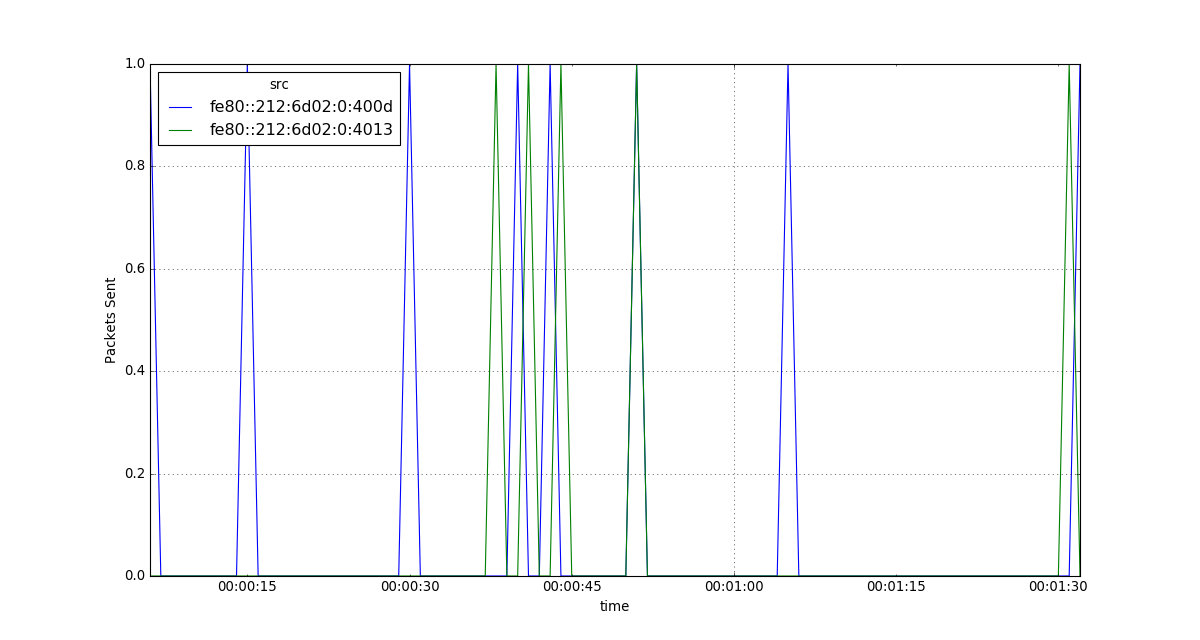

In [120]:
trace_3hop('3HOP-1node-1br-notraffic-run1.csv','1s')

<IPython.core.display.Javascript object>


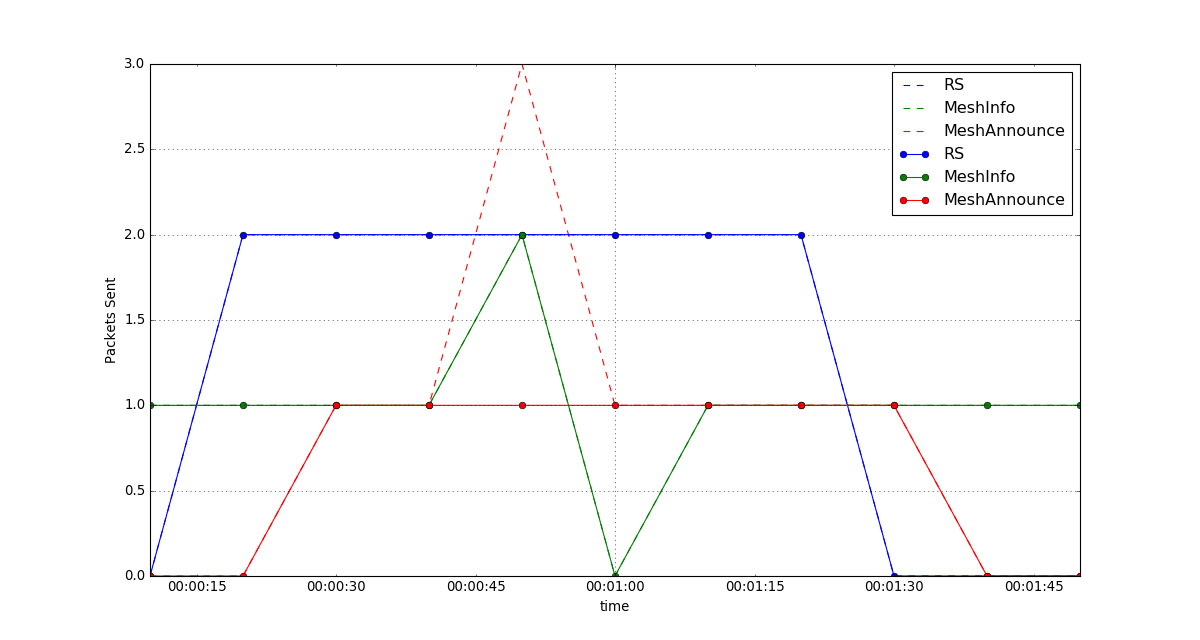

In [5]:
plot_serp('SERP-1hop-7nodes-incremental-notraffic-run1.csv', '10s')

<IPython.core.display.Javascript object>


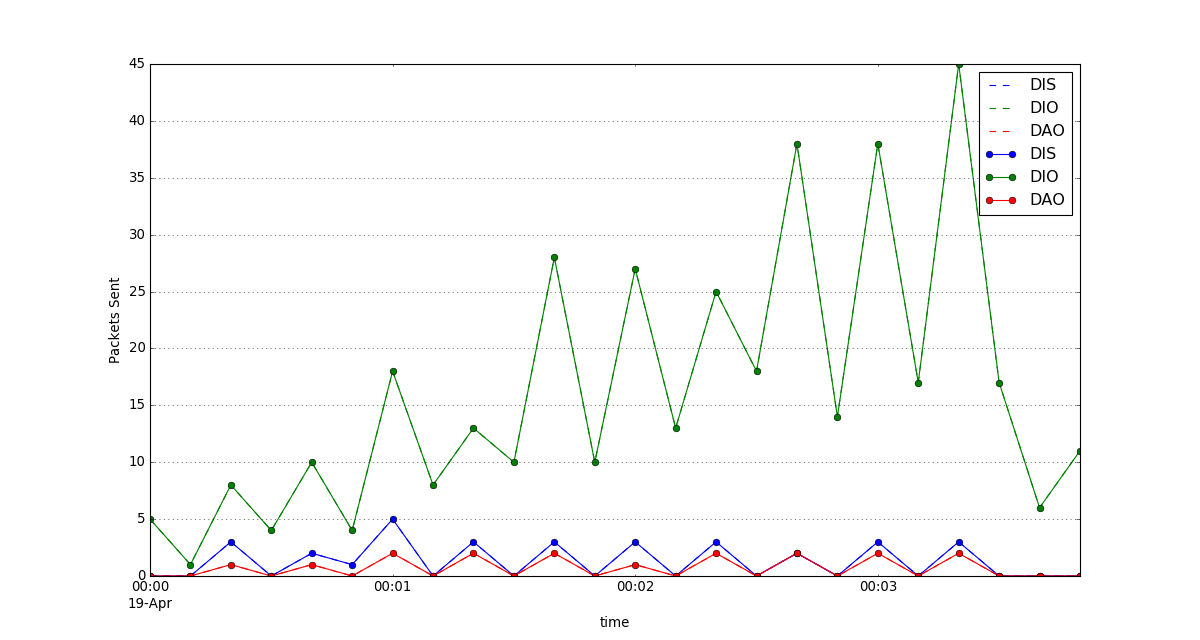

In [6]:
plot_rpl('RPL-1hop-10nodes-incremental-notraffic-run1.csv', '10s')

In [96]:
plot_rpl_node('RPL-1hop-10nodes-incremental-notraffic-run1.csv','1s')

ValueError: Index contains duplicate entries, cannot reshape

<IPython.core.display.Javascript object>


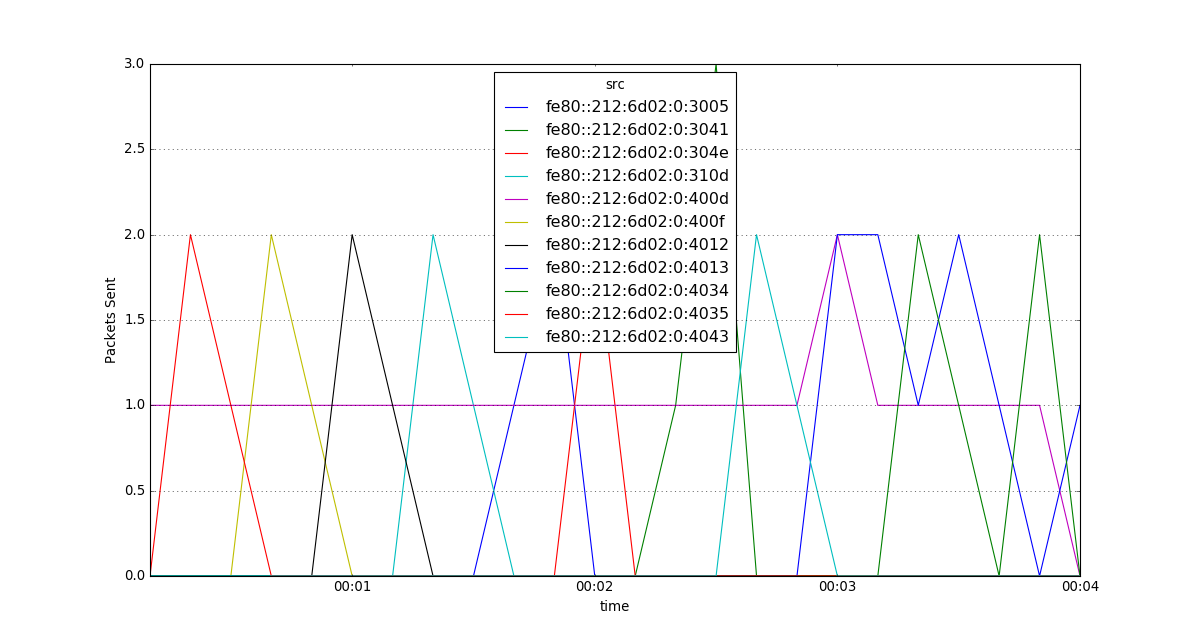

In [78]:
a = plot_serp2('SERP-1hop-10nodes-incremental-notraffic-run1.csv', '10s')

<IPython.core.display.Javascript object>


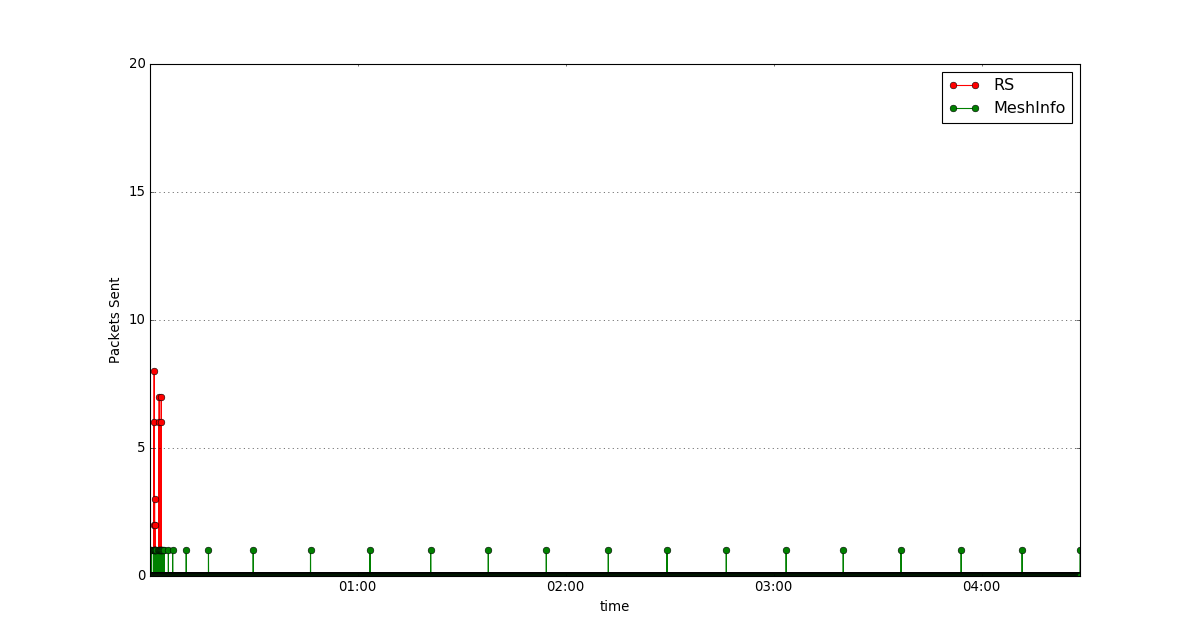

In [145]:
plot_3hop('serp-allmotes.csv')

<IPython.core.display.Javascript object>


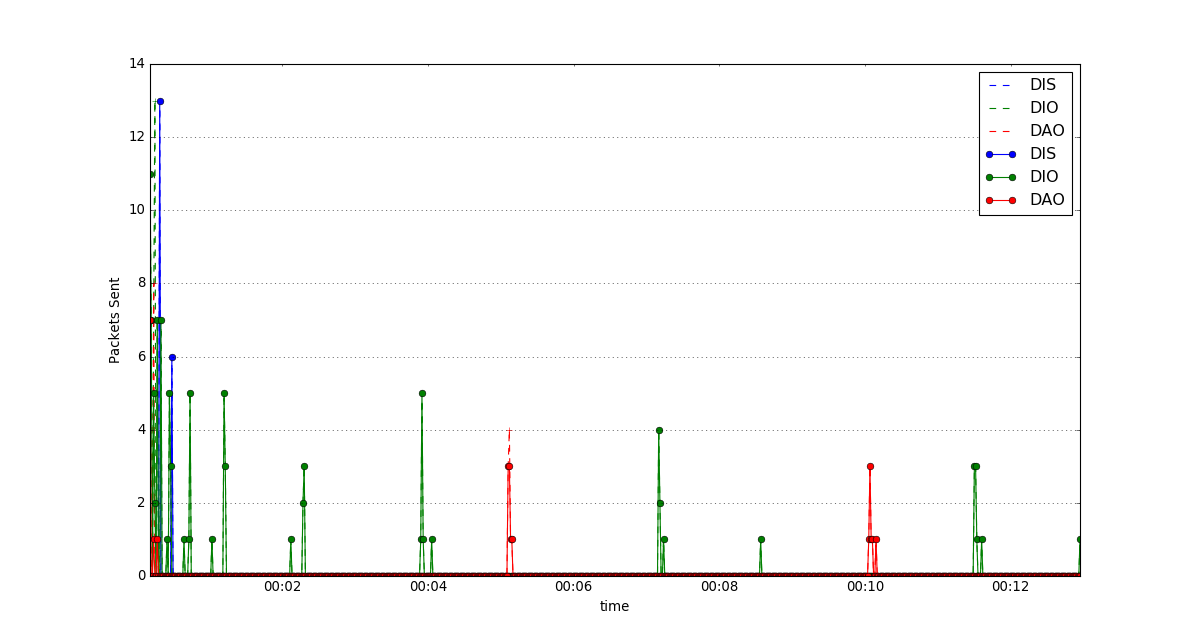

In [148]:
plot_rpl('rpl-allmotes.csv')